## House Prices

This is a Kaggle platform competition, available at https://www.kaggle.com/c/house-prices-advanced-regression-techniques. From a dataset with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, challenges to predict the final price of each home. 

**Business Problem:**
    From a business standpoint, being able to accurately predict a home's selling value is useful for companies like a Startup, which identifies below-market opportunities in New York real estate sales to reform and resell with some profit in the shortest possible time. If the predictive model can find bargains in the offers available, it can generate great value for the company. In addition, it can be used by families looking to pay fair value for a new home.

Okay, let's go to the price analysis of homes. From my experience in construction, usually what most impacts the price of a home is the total area, location and quality of the finish. In our dataset, there are many other variables that show some influence on the final price. In this journey of knowledge, I made several discoveries of tools and ways to analyze the data presented. I used the following kernels as a example:
    - https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
    - https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
    - https://www.kaggle.com/itslek/blend-stack-lr-gb-0-10649-house-prices-v57
    
Following it's my work on data analysis, exploration and modeling.
    
    The final ranking results for some approaches are as follows:
    1. The features and SalePrice with MinMaxScaler: Model Keras 0.15444
    2. The features with MinMaxScaler and SalePrice with Log Transformation: Model Keras 0.13754, Model XGBRegressor 0.13184, Model Stacked 0.11788
    3. The features and SalePrice with StandardScaler: Model Keras 0.14701
    4. The features with StandardScaler and SalePrice with Log Transformation: Model Keras 0.14038
    5. All features without normalization: Model Keras 0.15824
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
#Set max columns for visualization dataframes
pd.set_option('display.max_columns', 350)

In [2]:
import os
for dirname, _, filenames in os.walk('../'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../src/script.ipynb
../lib/kaggle/gcp.py
../lib/kaggle/competitions/twosigmanews/__init__.py
../lib/kaggle/competitions/twosigmanews/env.py
../input/house-prices-advanced-regression-techniques/sample_submission.csv
../input/house-prices-advanced-regression-techniques/train.csv
../input/house-prices-advanced-regression-techniques/test.csv
../input/house-prices-advanced-regression-techniques/data_description.txt
../working/__notebook__.ipynb
../working/__output__.json


In [3]:
#Load datasets
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#Delete column ID
test.drop('Id', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)

Exploring all columns of dataset

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

During the analysis, I separated the numerical and categorical variables. For each numerical variable I generated a scatter plot and for categorical a boxplot, to verify the linear correlation with price. Below is an example of each type of chart used.


The next scatter plot demonstrates a strong correlation between home area and price, and presents outlier data that has a very large area and a low price. These two points will be deleted.



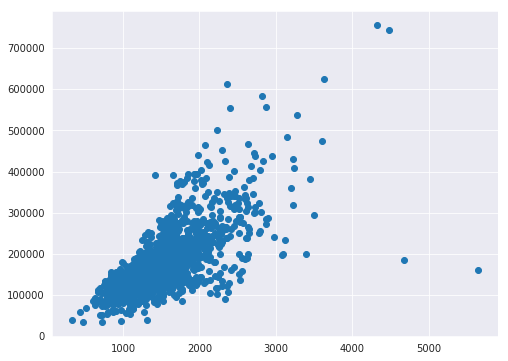

In [5]:
#This scatter plot grlivarea/saleprice
plt.figure(figsize=(8, 6))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])

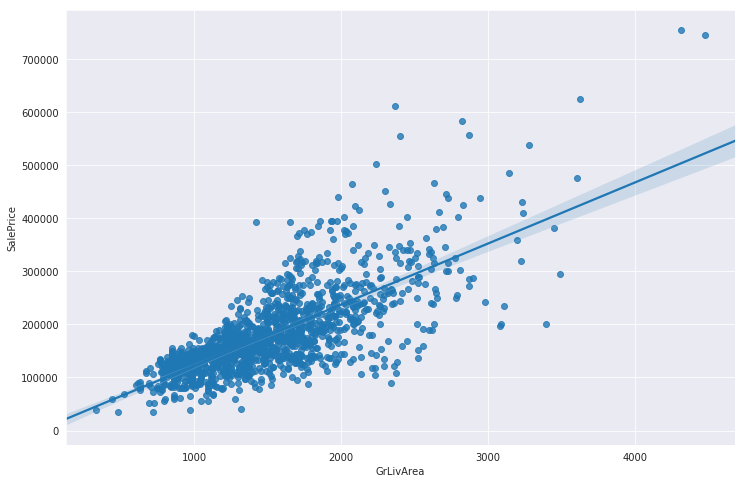

In [6]:
#Deleting outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)

#Check the graphic again
plt.figure(figsize=(12, 8))
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], )

In the next graph I used a boxplot to demonstrates a strong correlation between OverallQual (overall quality of the residence) variable and price.

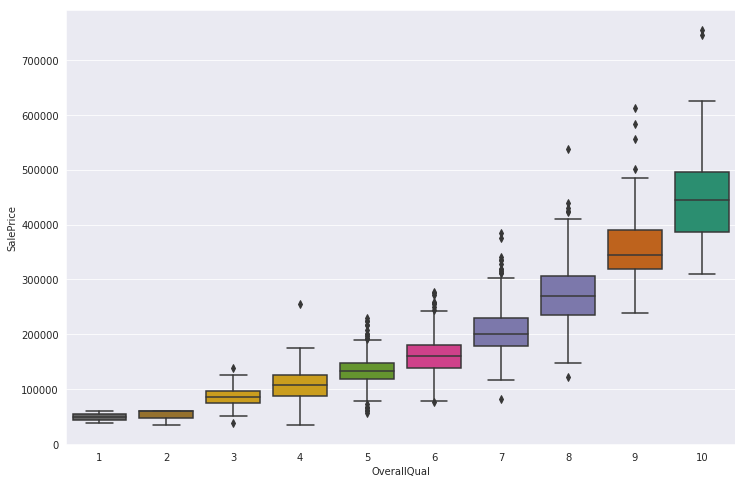

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(train['OverallQual'], train['SalePrice'],palette="Dark2_r")

At this point I apply normalization to the SalePrice column. I try logarithmic transformation, MixMaxScaler and StandardScaler, being the best performance is logarithmic.

In [8]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

#applying StandardScaler Normalization
#standardSalePrice = StandardScaler()
#train['SalePrice'] = standardSalePrice.fit_transform(train['SalePrice'][:,np.newaxis])


#applying StandardScaler Normalization
#minMaxScalerSalePrice = preprocessing.MinMaxScaler()
#train['SalePrice'] = minMaxScalerSalePrice.fit_transform(train['SalePrice'][:,np.newaxis])

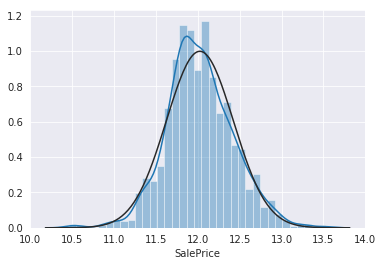

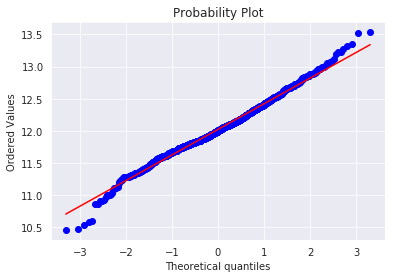

In [9]:
#Checking the normal distribution
from scipy import stats
from scipy.stats import norm

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Concatenated both datasets to maintain the data standard in both sets.

In [10]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.index

RangeIndex(start=0, stop=2917, step=1)

### Missing Values

#### Train Data
For missing values from the training set, the columns will be deleted. Only the 'Electrical' variable that will be kept and added the most common value for that year's construction.

In [11]:
total = data.loc[data['SalePrice'].notnull()].isnull().sum().sort_values(ascending=False)
percent = (data.loc[data['SalePrice'].notnull()].isnull().sum()/data.loc[data['SalePrice'].notnull()].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.sort_values(by='Total', ascending=False).head(20)

,Total,Percent
PoolQC,1452,0.996
MiscFeature,1404,0.963
Alley,1367,0.938
Fence,1177,0.807
FireplaceQu,690,0.473
LotFrontage,259,0.178
GarageFinish,81,0.056
GarageCond,81,0.056
GarageQual,81,0.056
GarageYrBlt,81,0.056


In [12]:
#dealing with missing data
data.drop((missing_data[missing_data['Total'] > 1]).index, 1, inplace=True)

#Electrical set with the most value for YearBuilt
data['Electrical'].fillna('SBrkr', inplace=True)

#Checking that there's no missing data missing...
data[data['SalePrice'].notnull()].isnull().sum().max()

0

#### Test Data
The test set present few occurrences of missing values. I will be completed with most common values in clusters with other house characteristics.

In [13]:
totalTest = data[data['SalePrice'].isnull()].isnull().sum().sort_values(ascending=False)
percentTest = (data[data['SalePrice'].isnull()].isnull().sum()/data[data['SalePrice'].isnull()].isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([totalTest, percentTest], axis=1, keys=['Total', 'Percent'])
missing_data_test.sort_values(by='Total', ascending=False).head(20)

,Total,Percent
SalePrice,1459,1.000
MSZoning,4,0.003
Functional,2,0.001
Utilities,2,0.001
BsmtHalfBath,2,0.001
BsmtFullBath,2,0.001
BsmtFinSF1,1,0.001
GarageCars,1,0.001
TotalBsmtSF,1,0.001
GarageArea,1,0.001


In [14]:
#The house don't have garage, so the values will be fill with zero
data['GarageCars'].fillna(0 , inplace=True)
data['GarageArea'].fillna(0 , inplace=True)


#Replaced with the most common value
data['MSZoning'].fillna(data['MSZoning'].value_counts().index[0], inplace=True)

data['Functional'].fillna(data['Functional'].value_counts().index[0], inplace=True)

#The house don't have garage, so the values will be fill with zero
data['BsmtFullBath'].fillna(0 , inplace=True)
data['BsmtHalfBath'].fillna(0 , inplace=True)
data['BsmtFinSF1'].fillna(0 , inplace=True)
data['BsmtFinSF2'].fillna(0 , inplace=True)
data['BsmtUnfSF'].fillna(0 , inplace=True)
data['TotalBsmtSF'].fillna(0 , inplace=True)


#Replaced with the most common value for column as OverallQual = 5
data['KitchenQual'].fillna('TA', inplace=True) 

#It is the same residence that doesn't have the information. I checked the most common value for ExterCond for home that is "VinylSd"
data['Exterior1st'].fillna('VinylSd', inplace=True)
data['Exterior2nd'].fillna('VinylSd', inplace=True)

#Just 1 registry. Replaced with the most common value for column as SaleCondition = 'Normal'
data['SaleType'].fillna('WD', inplace=True)

### Feature Engineering

At this point, some useful variables for SalePrice are created, such as the total area, total bathrooms, and whether the house is new or used.

In [15]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['TotBathrooms'] = data['FullBath'] + (data['HalfBath']*0.5) + data['BsmtFullBath'] + (data['BsmtHalfBath']*0.5)

In [16]:
def remold(built, remodAdd):
    if (built == remodAdd):
        return 1
    else:
        return 0

In [17]:
#Adding ‘House Age’ and IsNew variables
data['Age'] = data['YrSold']-data['YearRemodAdd']
data['IsNew'] = data.apply(lambda row: remold(row['YrSold'], row['YearBuilt']), axis=1)

In [18]:
data['TotalSqFeet'] = data['GrLivArea'] + data['TotalBsmtSF']

### Drop Features

At my data analysis and visualization, some features showed no utility. Such as little variance or few records that don't helpful the regression algorithm.

In [19]:
featuresNotGood = ['3SsnPorch', 'BsmtHalfBath', 'BsmtUnfSF', 'LandSlope','LotConfig', 'LowQualFinSF', 
                   'MiscVal', 'MoSold', 'PoolArea', 'Street', 'Utilities', 'YrSold']

data.drop(featuresNotGood, axis=1, inplace=True)

### Normalization

The numeric variables will be normalized. I tried with logarithmic transformation, MixMaxScaler and StandardScaler.
For categorical variables I used the pandas GetDummies function, which creates a binary matrix for each feature.

In [20]:
#Variáveis numéricas para aplicação de transformação logaritma
#'MasVnrArea' 'LotFrontage',
featuresNum = ['BsmtFinSF1', 'BsmtFinSF2', 'GarageArea',  'WoodDeckSF',
               '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'TotalSF',
              'EnclosedPorch', 'LotArea', 'OpenPorchSF', 'ScreenPorch' , 'TotalSqFeet']


In [21]:
from sklearn import preprocessing


#for f in featuresNum:
#    data[f] = np.where(data[f] > 0, np.log(data[f]), data[f] )

    #fig1 = plt.figure()
    #plt.title(f)
    #sns.distplot(datatest[datatest[f]>0][f], fit=norm);
    #fig = plt.figure()
    #res = stats.probplot(datatest[datatest[f]>0][f], plot=plt)
    
#StandardScaler transformation
#standardScaler = preprocessing.StandardScaler()
#data[featuresNum] = standardScaler.fit_transform(data[featuresNum])

#MinMaxScaler Transformation
min_max_scaler = preprocessing.MinMaxScaler()
data[featuresNum] = min_max_scaler.fit_transform(data[featuresNum])

In [22]:
data.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,MSSubClass,OpenPorchSF,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,TotalSF,TotBathrooms,Age,IsNew,TotalSqFeet
count,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,1458.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000
mean,0.173,0.163,2.860,0.109,0.033,0.429,0.023,0.596,1.567,0.317,1.766,0.245,0.380,1.045,0.041,57.136,0.064,5.565,6.086,12.024,0.028,6.448,0.206,0.066,1971.288,1984.248,0.224,2.217,23.545,0.039,0.225
std,0.081,0.207,0.823,0.111,0.111,0.524,0.064,0.645,0.552,0.144,0.762,0.104,0.503,0.215,0.036,42.532,0.090,1.113,1.407,0.400,0.098,1.564,0.084,0.089,30.287,20.892,0.079,0.807,20.890,0.194,0.079
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,0.000,1.000,1.000,10.460,0.000,2.000,0.000,0.000,1872.000,1950.000,0.000,1.000,-2.000,0.000,0.000
25%,0.114,0.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.215,1.000,0.166,0.000,1.000,0.029,20.000,0.000,5.000,5.000,11.775,0.000,5.000,0.156,0.000,1953.000,1965.000,0.169,1.500,4.000,0.000,0.169
50%,0.157,0.000,3.000,0.092,0.000,0.000,0.000,1.000,2.000,0.323,2.000,0.233,0.000,1.000,0.038,50.000,0.035,5.000,6.000,12.002,0.000,6.000,0.194,0.000,1973.000,1993.000,0.214,2.000,15.000,0.000,0.215
75%,0.221,0.341,3.000,0.183,0.000,1.000,0.000,1.000,2.000,0.387,2.000,0.296,1.000,1.000,0.048,70.000,0.094,6.000,7.000,12.274,0.000,7.000,0.256,0.118,2001.000,2004.000,0.269,2.500,43.000,0.000,0.270
max,1.000,1.000,8.000,1.000,1.000,3.000,1.000,4.000,4.000,1.000,5.000,1.000,2.000,3.000,1.000,190.000,1.000,9.000,10.000,13.534,1.000,15.000,1.000,1.000,2010.000,2010.000,1.000,7.000,60.000,1.000,1.000


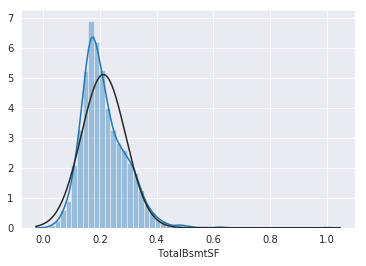

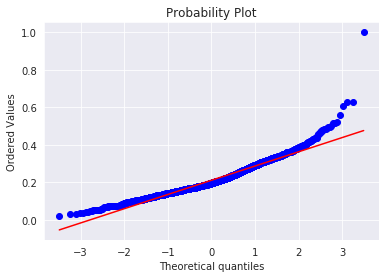

In [23]:
#Checking the distribution
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [24]:
len(data.columns)

55

In [25]:
#Categorical features
# ['GarageCond', 'BsmtFinType1', 'GarageType', 'MiscFeature', 'BsmtQual', 'Alley', 'BsmtExposure', 'MasVnrType', 'GarageFinish', 'FireplaceQu', 'BsmtCond', 'GarageQual']
featureCat = ['BedroomAbvGr',  'BldgType',  'BsmtFullBath',  'CentralAir',  'Condition1',  'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
               'Exterior2nd', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
               'LandContour', 'LotShape', 'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
               'SaleType', 'TotRmsAbvGrd']

In [26]:
#convert categorical variable into dummy
#data = pd.get_dummies(data, columns=featureCat, drop_first=True)
data = pd.get_dummies(data, drop_first=True)

In [27]:
data.shape

(2917, 181)

In [28]:
data.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,MSSubClass,OpenPorchSF,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,TotalSF,TotBathrooms,Age,IsNew,TotalSqFeet,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,1458.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917

### Modeling

Split dataframe into training set and testing set, for training and prediction of results.

In [29]:
train = data[data['SalePrice'].notnull()]
test = data[data['SalePrice'].isnull()]

y_train = train['SalePrice'].ravel()
train.drop('SalePrice', axis=1, inplace=True)
test.drop('SalePrice', axis=1, inplace=True)
X_train = train.values
X_test = test.values

In [30]:
X_train.shape

(1458, 180)

In [31]:
X_test.shape

(1459, 180)

In [32]:
from sklearn.model_selection import train_test_split

#Split dataset train for evaluation model
XX_train, XX_test, yy_train, yy_test = train_test_split(train, y_train, test_size=0.15, random_state=42)

### Keras Model

The neural network-based model uses the TensorFlow library for mounting a Deep Model. I did many tests with multilayer model, with regularizers, DropOut and different optimizers, however the simplest model got better results.

In [33]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [34]:
#Create Keras Model 1
def linear_model_1():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.1)))
    model.add(tf.keras.layers.Dropout(0.15))
    model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
    model.add(tf.keras.layers.Dropout(0.15))
    model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [35]:
#Create Keras Model
def linear_model():
    units = 256
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units, input_dim=train.shape[1],  activation='relu'))
    model.add(tf.keras.layers.Dense(units,  activation='relu'))
    model.add(tf.keras.layers.Dense(units,  activation='relu'))
    model.add(tf.keras.layers.Dense(units,  activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer="adam")
    
    return model

In [36]:
model = linear_model()
history = model.fit(XX_train, yy_train, epochs=100, batch_size=5,  verbose=0, validation_data=(XX_test, yy_test),)

In [37]:
#Get accuracy of model
y_pred_keras = model.predict(XX_test)
np.sqrt(mean_squared_error(yy_test, y_pred_keras))

0.2087176010871073

dict_keys(['loss', 'val_loss'])


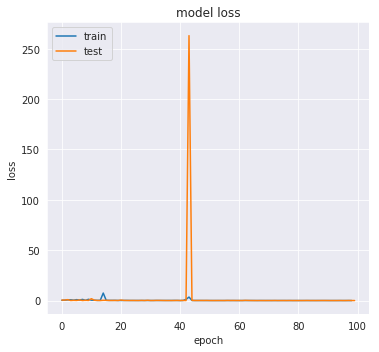

In [38]:
#Plot learning curves to verified bias and variance of model, and identified overfitting or underfitting

history.history['loss'].remove(np.max(history.history['loss']))

def plotLearningCurves(history):
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(10,5))
       
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.tight_layout()
    
    plt.show()

plotLearningCurves(history)

### Prediction and Submission

Here the predictions are generated and the inverse transformation is performed for the SalePrice results, according to the type of normalization used.

In [39]:
predictions_keras = model.predict(X_test)

#Log Transformation
predictions_keras = np.expm1(predictions_keras.ravel())

#MinMaxScaler
#predictions_keras = minMaxScalerSalePrice.inverse_transform(np.reshape(predictions_keras.ravel(), (-1, 1)))

#StandardScaler
#predictions_keras = standardSalePrice.inverse_transform(np.reshape(predictions_keras.ravel(), (-1, 1)))

In [40]:
#Create the dataset for submission
subm_house = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
subm_house.iloc[:,1] = np.floor(predictions_keras.ravel())

subm_house.to_csv("submission_keras.csv", index=False)

In [41]:
subm_house.head()

,Id,SalePrice
0,1461,93448.000
1,1462,122283.000
2,1463,144807.000
3,1464,162274.000
4,1465,170686.000


In [42]:
os.chdir(r'/kaggle/working/')

In [43]:
#Create Link for download dataset and submit on competition
from IPython.display import FileLink
FileLink(r'submission_keras.csv')

/kaggle/working/submission_keras.csv

### XGB Regressor

I created a simple model of the XGBRegressor algorithm to make predictions and compare with the Deep Learning model.

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb_model = XGBRegressor(objective='reg:linear',
                          colsample_bytree=0.4603, 
                          gamma=0.0468,
                          learning_rate=0.05, 
                          max_depth=3,
                          min_child_weight=1.7817, 
                          n_estimators=2200,
                          reg_alpha=0.4640, 
                          reg_lambda=0.8571,
                          subsample=0.5213, 
                          silent=1,
                          random_state=7, 
                          nthread = -1
                        )

xgb_model.fit(XX_train, yy_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [46]:
y_pred_xgb = xgb_model.predict(XX_test)
np.sqrt(mean_squared_error(yy_test, y_pred_xgb))

0.12104725918377938

In [47]:
xgb_model.fit(X_train, y_train, verbose=False)

# make predictions
predictions = xgb_model.predict(X_test)

In [48]:
#Create the dataset for submission
subm_house = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
subm_house.iloc[:,1] = np.expm1(predictions)

subm_house.to_csv("submission_XGB.csv", index=False)

In [49]:
subm_house.head()

,Id,SalePrice
0,1461,122948.875
1,1462,162146.016
2,1463,188615.562
3,1464,191010.062
4,1465,194700.906


In [50]:
from IPython.display import FileLink
FileLink(r'submission_XGB.csv')

/kaggle/working/submission_XGB.csv

### Stacked Regressions

This part is inspirated in kernel of Serigne available at https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard.
This model uses some regressors and stacks the result with a different weight for each algorithm. This increased the accuracy of the model and improved the results.

In [51]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
import lightgbm as lgb

In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [53]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [54]:
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [55]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [56]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [57]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [58]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [59]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [60]:
#Function to evaluation
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [61]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

Let's go to train models

In [62]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07975240453939866


In [63]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08235635720642333


In [64]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.076098644935588


In [65]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07763852095276792


In [66]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
averaged_models.fit(train, y_train)
train_pred = averaged_models.predict(train)
ave_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, train_pred))

0.08098984590051714


In [67]:
ensemble = stacked_pred*0.5 + ave_pred*0.15+ xgb_pred*0.15 + lgb_pred*0.2

In [68]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.50 + train_pred*0.15 +xgb_train_pred*0.15 + lgb_train_pred*0.2 ))

RMSLE score on train data:
0.07738542264997161


In [69]:
#Create the dataset for submission
subm_house = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
subm_house.iloc[:,1] = ensemble

subm_house.to_csv("submission_stack.csv", index=False)

In [70]:
FileLink(r'submission_stack.csv')

/kaggle/working/submission_stack.csv